<div style="border:solid Chocolate 2px; padding: 40px">

Артем, привет, меня зовут Станислав, и я буду проверять твой проект. Предлагаю общаться на «ты», но если это неудобно - дай знать, и мы перейдем на «вы».
Это учебный проект и здесь не стоит бояться делать ошибки, я хочу поделиться своим опытом и помочь тебе стать аналитиком данных.
Уже выполнена большая работа над проектом, давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера:</b> Так выделены самые важные замечания. Как только ты их исправишь проект будет принят. </div>

<div class="alert alert-warning">
⚠️  <b>Комментарий с небольшим замечанием или советом ревьюера:</b> Так выделены небольшие замечания или советы. 
</div>

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом.
Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера по проекту

<div class="alert alert-success">
Проделана хорошая аналитическая работа. Соблюдена структура проекта и написаны хорошие выводы. Есть несколько замечаний, исправь их и проект будет принят.
</div>

<div class="alert alert-danger">
    
- скорректируй, пожалуйста, код, выпадающий в ошибку
    
- дополни, пожалуйста, промежуточные выводы и добавь рекомендации.
    
</div>
</div>


Здравствуйте, направлю вам ,пока что, не полностью сделанную работу, чтобы понимать в правильном направлении я ее выполняю. Спасибо.

# Исследование работы компании Procrastinate Pro+

##### Описание проекта.
Последние несколько месяцев компания терпит убытки, несмотря на вложения в рекламу. 

Основная цель разобраться в причинах и помочь компании выйти в плюс.

Есть данные о привлеченных пользователях с 01.05.2019 по 27.10.2019:  
- логи серверов с данными об их посещениях, 
- выгрузка их покупок за этот период, 
- рекламные расходы.

##### Цель проекта изучить:
-  откуда приходят пользователи и какими устройствами они пользуются
-  сколько стоит привлечение пользователей из различных рекламных каналов
-  сколько денег приносит каждый клиент
-  когда расходы на привлечение клиента окупаются
-  какие факторы мешают привлечению клиентов

##### План работы:
- Загрузить данные
- Произвести предобработку данных. Проверить на пропуски значений, дубликаты, ошибки типов данных.
- Визуализировать и изучить обрботанные данные, выполнить первоначальные наблюдения.
- Произвести расчеты на основе полученных данных, выявить закономерности. 
- Сделать выводы.

<div class="alert alert-success">
✔️<b>Комментарий с комплиментом ревьюера:</b> 

Здорово, что ты добавил в начале проекта введение, расписал этапы проекта и описал задачи. 



In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import plotly.express as px


import warnings
warnings.filterwarnings(action='ignore')

### Шаг. Загрузка данных

In [78]:
try:
    visits = pd.read_csv('C:\\Users\\tema-\\Downloads\\Jupyter\\Doc_csv\\visits_info_short.csv')
    orders = pd.read_csv('C:\\Users\\tema-\\Downloads\\Jupyter\\Doc_csv\\orders_info_short.csv')
    costs = pd.read_csv('C:\\Users\\tema-\\Downloads\\Jupyter\\Doc_csv\\costs_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')


<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> 

Молодец, что загружаешь все библиотеки в начале проекта. Так сложней случайно удалить ячейку с загрузкой нужной библиотеки и сделать код не работающим. А получатель отчета сразу поймет, какие библиотеки ты используешь и какие ему нужно установить для запуска проекта.

</div>


Данные о посещениях

In [79]:
display('Данные о показах', visits)
display('Данные о заказах', orders)
display('Данные о расходах', costs)

'Данные о показах'

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


'Данные о заказах'

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


'Данные о расходах'

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [80]:
display('Данные о показах', visits.info())
display('Данные о заказах', orders.info())
display('Данные о расходах', costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


'Данные о показах'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


'Данные о заказах'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


'Данные о расходах'

None

Итоги обзора :
- типы данных с датой не приведены к нужному формату
- наименования стобцов в разном регистре, с пробелами
- пропусков данных не обнаружено

Структура visits:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Структура orders:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Структура costs:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> 

Отлично

</div>


### Шаг  Обработка данных

Наименования столбцов приведем к нужному регистру и пробелы заменим нижним подчеркиванием.

In [81]:
visits.columns = [name.lower().replace(' ', '_') for name in visits.columns]
orders.columns = [name.lower().replace(' ', '_') for name in orders.columns]
costs.columns = costs.columns.str.lower()

display(visits.columns)
display(orders.columns)
display(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

Типы с датой приведем к нужному формату

In [82]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

display(visits.info())
display(orders.info())
display(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Посчитаем наличие дубликатов

In [83]:
display('Посещения' ,visits.duplicated().sum())
display('Заказы', orders.duplicated().sum())
display('Расходы' ,costs.duplicated().sum())

'Посещения'

0

'Заказы'

0

'Расходы'

0

Посчитаем наличие неявных дубликатов, приведем данные в таблице к одному формату

In [84]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.lower()

display('Посещения' ,visits.duplicated().sum())
display('Заказы', orders.duplicated().sum())
display('Расходы' ,costs.duplicated().sum())


'Посещения'

0

'Заказы'

0

'Расходы'

0

Дубликатов не обнаружено

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b>Исправил</div>

</div>

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> 

Проделана хорошая работа по подготовке данных к анализу. 
    
Классно, что изучены данные проверены на дубликаты и изменены названия столбцов. 👍


<div class="alert alert-warning">
⚠️  <b>Комментарий с советом ревьюера:</b>


Здесь еще можно проверить на неявные дубликаты и добавить промежуточный вывод по проделанной работе, так проект будет выглядеть значительно лучше.   

  
</div>



### Шаг Задаем Функции
Зададим функции для вычислений Retention Rate, Conversion, LTV, ROI

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Для создания профиля.

In [85]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Функция для расчёта удержания(Retention Rate)

In [86]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Подсчёта конверсии Conversion

In [87]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Для подсчёта LTV и ROI

In [88]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
  
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Для сглаживания данных

In [89]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

для визуализации удержания

In [90]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

для визуализации конверсии

In [91]:
# функция для визуализации конверси

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [		
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

 для визуализации LTV и ROI

In [92]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> 

Супер, созданы все необходимые функции для дальнейшего исследования 👍
</div>


### ШАГ.  Исследовательский анализ данных
 Составим таблицу профиля для пользователей.


In [93]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


##### Определим минимальную и максимальную даты привлечения пользователей. 

Установим момент и горизонт анализа.
Горизонт по заданию необходим за две недели от максимальной даты привлечения.


In [94]:
observation_date = profiles['dt'].max()  

horizon_days = 14 

min_analysis_date = profiles['dt'].min()

max_analysis_date =  observation_date - timedelta(days=horizon_days - 1) 


print(f'Горизонт анализа : {horizon_days}')
print(f'Момент анализа : {observation_date}')
print(f'Минимальная дата : {min_analysis_date}')
print(f'Максимальная дата : {max_analysis_date}')

Горизонт анализа : 14
Момент анализа : 2019-10-27
Минимальная дата : 2019-05-01
Максимальная дата : 2019-10-14


<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера:</b> 

Код в ячейке выше выдает ошибку: "NameError: name 'profiles' is not defined"
    
Перед отправкой проекта на проверку необходимость убедиться, что код в твоем проекте выполняется последовательно в каждой ячейке, для этого во вкладке Kernel необходимо запустить Restart&RunAll.
</div>


<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Поправил</div>

##### Определим из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 

Построим таблицу, отражающую количество пользователей  и определим долю платящих из каждой страны

In [95]:
country_percent_pay = ( profiles.pivot_table( index='region',
                                           columns='payer',
                                           values='user_id',
                                           aggfunc=({'user_id':'count'}))
                                .rename(columns={True: 'payer', False: 'not_payer'})                    
                                .sort_values(by='payer', ascending=False)
)
country_percent_pay['all_users'] = country_percent_pay.not_payer + country_percent_pay.payer
country_percent_pay['payer_perc'] = (country_percent_pay.payer / (country_percent_pay.not_payer + country_percent_pay.payer) * 100).round(2)
country_percent_pay

payer,not_payer,payer,all_users,payer_perc
region,,,,
United States,93100,6902,100002,6.90
UK,16875,700,17575,3.98
France,16787,663,17450,3.80
Germany,14365,616,14981,4.11


Видно что процент больший процент покупающих пользователей находится в United States, так же и по количеству пользователей.

Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства

In [96]:
device_percent_pay = ( profiles.pivot_table( index='device',
                                           columns='payer',
                                           values='user_id',
                                           aggfunc=({'user_id':'count'}))
                                .rename(columns={True: 'payer', False: 'not_payer'})                    
                                .sort_values(by='payer', ascending=False)
)
device_percent_pay['all_users'] = device_percent_pay.not_payer + device_percent_pay.payer
device_percent_pay['payer_perc'] = (device_percent_pay.payer / (device_percent_pay.not_payer + device_percent_pay.payer) * 100).round(2)
device_percent_pay.sort_values(by='payer_perc', ascending=False)

payer,not_payer,payer,all_users,payer_perc
device,,,,
Mac,28130,1912,30042,6.36
iPhone,51097,3382,54479,6.21
Android,32982,2050,35032,5.85
PC,28918,1537,30455,5.05


Видно что доля платящих пользователей приходится на устройства Mac и iPhone, с небольшим отставанием идет Android, и послденее место у PC.

Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.



In [97]:
channel_percent_pay = ( profiles.pivot_table( index='channel',
                                           columns='payer',
                                           values='user_id',
                                           aggfunc=({'user_id':'count'}))
                                .rename(columns={True: 'payer', False: 'not_payer'})                    
                                .sort_values(by='payer', ascending=False)
)
channel_percent_pay['all_users'] = channel_percent_pay.not_payer + channel_percent_pay.payer
channel_percent_pay['payer_perc'] = (channel_percent_pay.payer / (channel_percent_pay.not_payer + channel_percent_pay.payer) * 100).round(2)
channel_percent_pay.sort_values(by='payer_perc', ascending=False)

payer,not_payer,payer,all_users,payer_perc
channel,,,,
FaceBoom,25587,3557,29144,12.20
AdNonSense,3440,440,3880,11.34
lambdaMediaAds,1924,225,2149,10.47
TipTop,17683,1878,19561,9.60
RocketSuperAds,4096,352,4448,7.91
WahooNetBanner,8100,453,8553,5.30
YRabbit,4147,165,4312,3.83
MediaTornado,4208,156,4364,3.57
LeapBob,8291,262,8553,3.06


Показатели по каналам привлечения клиентов:

- Заметно что наибольший трафик - из канала organic - 56439, но доля покупателей не высокая всего 2%, что касается наименьшего трафика - из канала lambdamediaads - 2149, доля покупателей состовляет 10.47% .
- Наибольшее количество покупателей приходит из канала faceboom -  3557 пользователей, наименьшее количество покупателей - из канала mediatornado - 156;
- Наибольшая доля покупателей - из канала faceboom - 12.2%, а наименьшая доля покупателей - из канала organic - 2.06%.

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> 

Доли в каждом разрезе рассчитаны корректно, лидеры конверсии отмечены верно. 👍
</div>


### Маркетинг

Посчитаем общую сумму расходов на маркетинг.


In [98]:
print(f'Общая сумма затрат на маркетинг состовляет : {costs.costs.sum().round(2)}')

Общая сумма затрат на маркетинг состовляет : 105497.3


Определим, как траты распределены по рекламным источникам.

In [99]:
costs_sum = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)
costs_sum

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


В лидерах по вложениям на маркетинг находится канал Tip Top c общей суммой 54751, немногим меньше канал FaceBoom в размере 32445.
Остальные каналы инвестируются меньше от 5151 в канал WahooNetBanner до 944 в канал YRabbit.

Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику

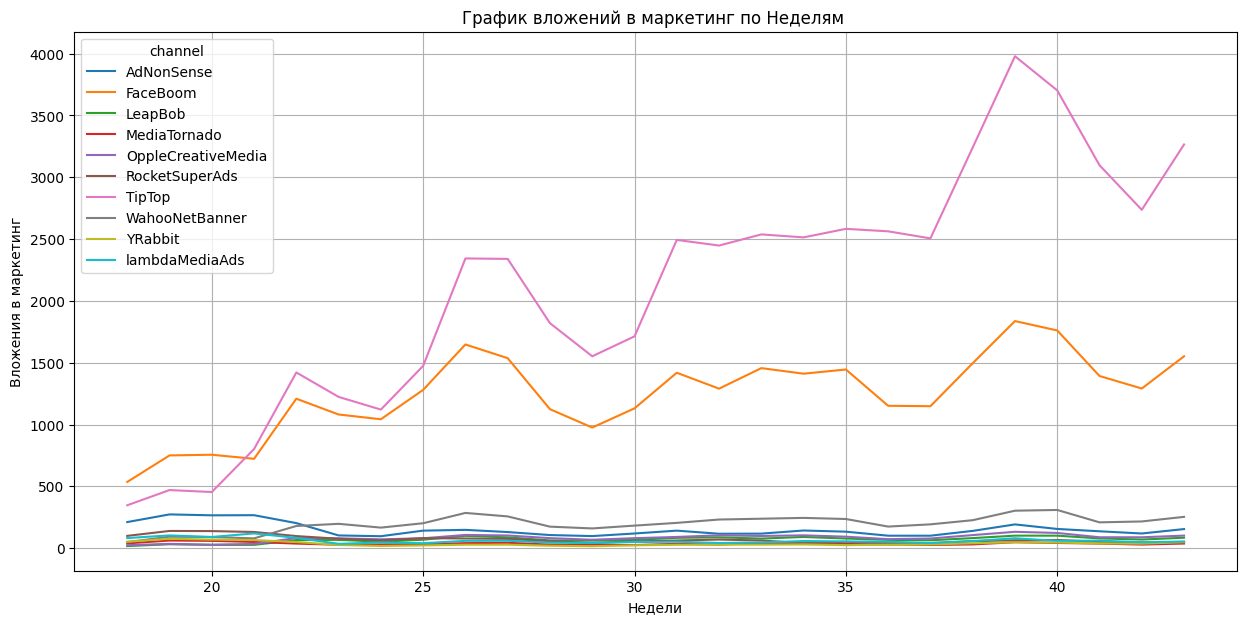

In [100]:
costs['week'] = pd.to_datetime(costs['dt']).dt.week
week = costs.pivot_table(index='channel',columns='week',values='costs', aggfunc='sum')
week.T.plot(figsize=(15, 7), grid=True)
plt.ylabel('Вложения в маркетинг')
plt.xlabel('Недели')
plt.title('График вложений в маркетинг по Неделям ');

Отчетливо видно что затраты на маркетинг канала Tip Top значительно выше остальных. Кривая общих расходов имеет восходящий тренд. Рост обусловлен увеличением расходов на каналы привлечения клиентов Tip Top. Та же тендеция сохраняется и для канала FaceBoom.

Построим график с визуализацией динамики изменения расходов во времени по месяцам по каждому источнику

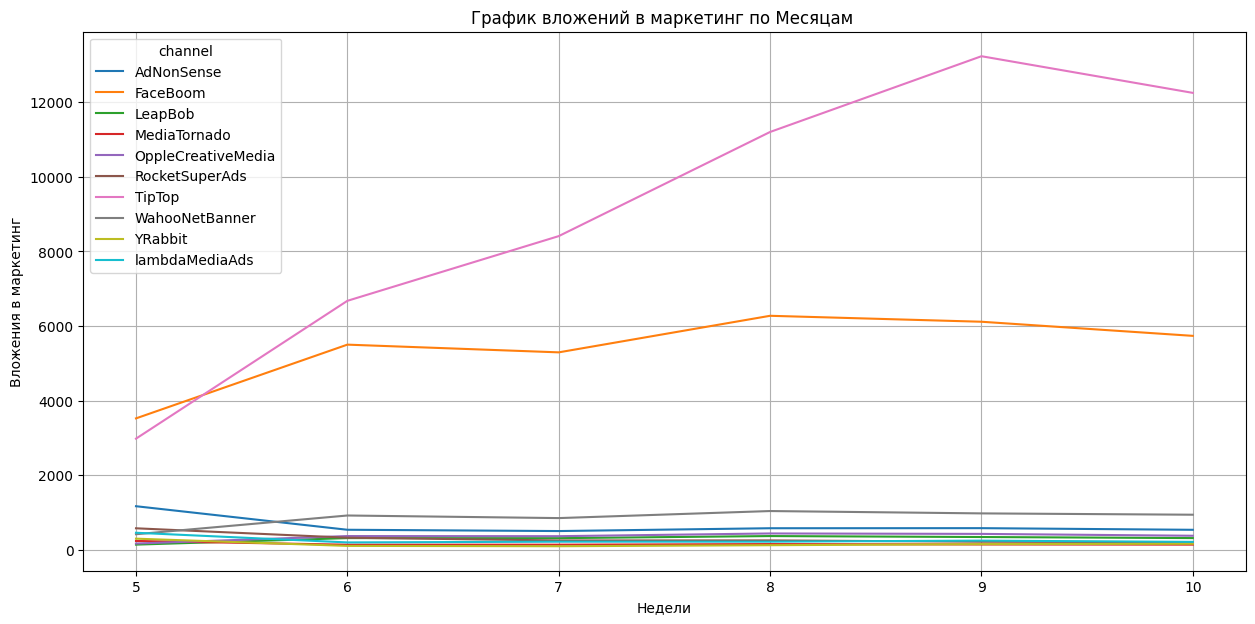

In [101]:
costs['month'] = pd.to_datetime(costs['dt']).dt.month
month = costs.pivot_table(index='channel',columns='month',values='costs', aggfunc='sum')
month.T.plot(figsize=(15, 7), grid=True)
plt.ylabel('Вложения в маркетинг')
plt.xlabel('Недели')
plt.title('График вложений в маркетинг по Месяцам ');

По месяцам сохраняются те же результаты, наибольшие значения приходятся на канал Tip Top.

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> 

Общая сумма расходов посчитана правильно. Классно, что выделена, какая доля средств была потрачена на FaceBoom и TipTop, теперь мы знаем кого винить в случае провальной рекламной компании.
    
Построены информативные графики - распределение трат по каждому источнику в динамике.
    
</div>


Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [102]:
cac = profiles.groupby(['user_id','channel']).agg({'acquisition_cost':'sum'}).reset_index()
cac.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False)


channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

Видно что САС канала Tip Top сильно отличается от остальных, что увеличивает средние показатели для общего САС. Наверняка можно сделать неправильные выводы касаемо вложений в маркетинг по компании. Построим график для наглядности.

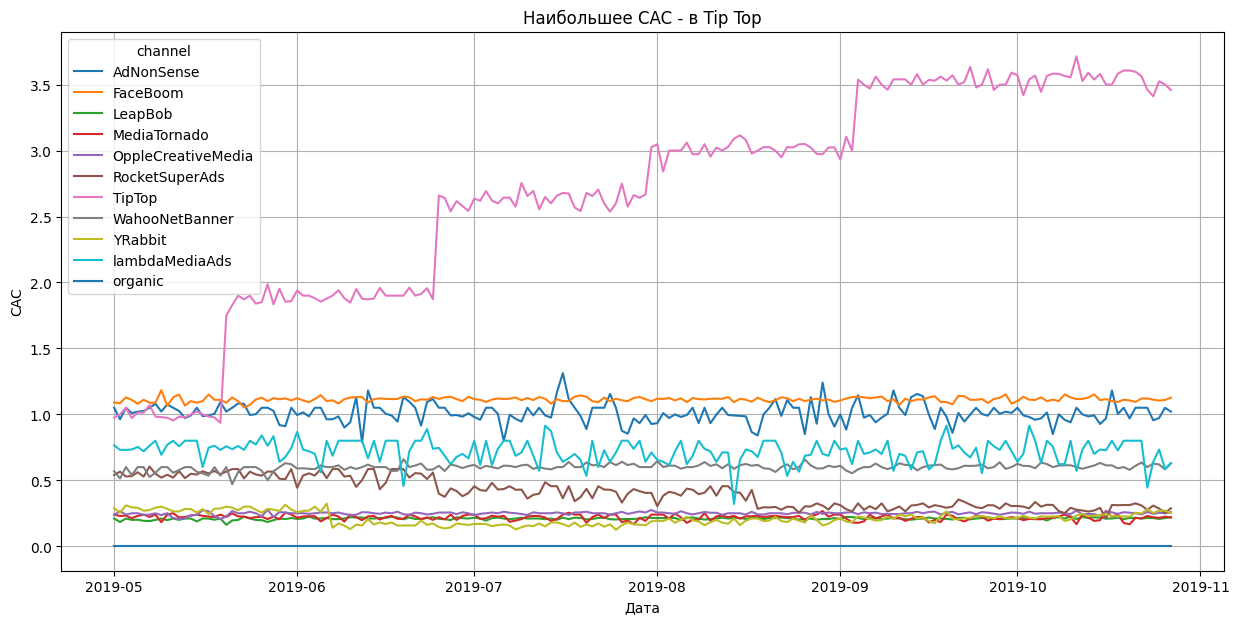

In [103]:
cac = profiles.pivot_table(index='channel', 
                           columns='dt', 
                           values='acquisition_cost', 
                           aggfunc='mean')

cac.T.plot(grid=True, figsize=(15, 7))
plt.xlabel('Дата')
plt.ylabel('CAC')
plt.title('Наибольшее CAC - в Tip Top')
plt.show()


###### Вывод:
Как и получилось показатели вложений по каналу Tip Top очень высокие, в то время как остальные каналы находятся в незначительных изменениях

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> 

Средний САС рассчитан верно, молодец  👍


### Оцените окупаемость рекламы
 Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.


Перед этим исключим пользователей из канала 'organic' чтобы графики были точнее.

In [104]:
profiles_pay = profiles.query('channel != "organic"')

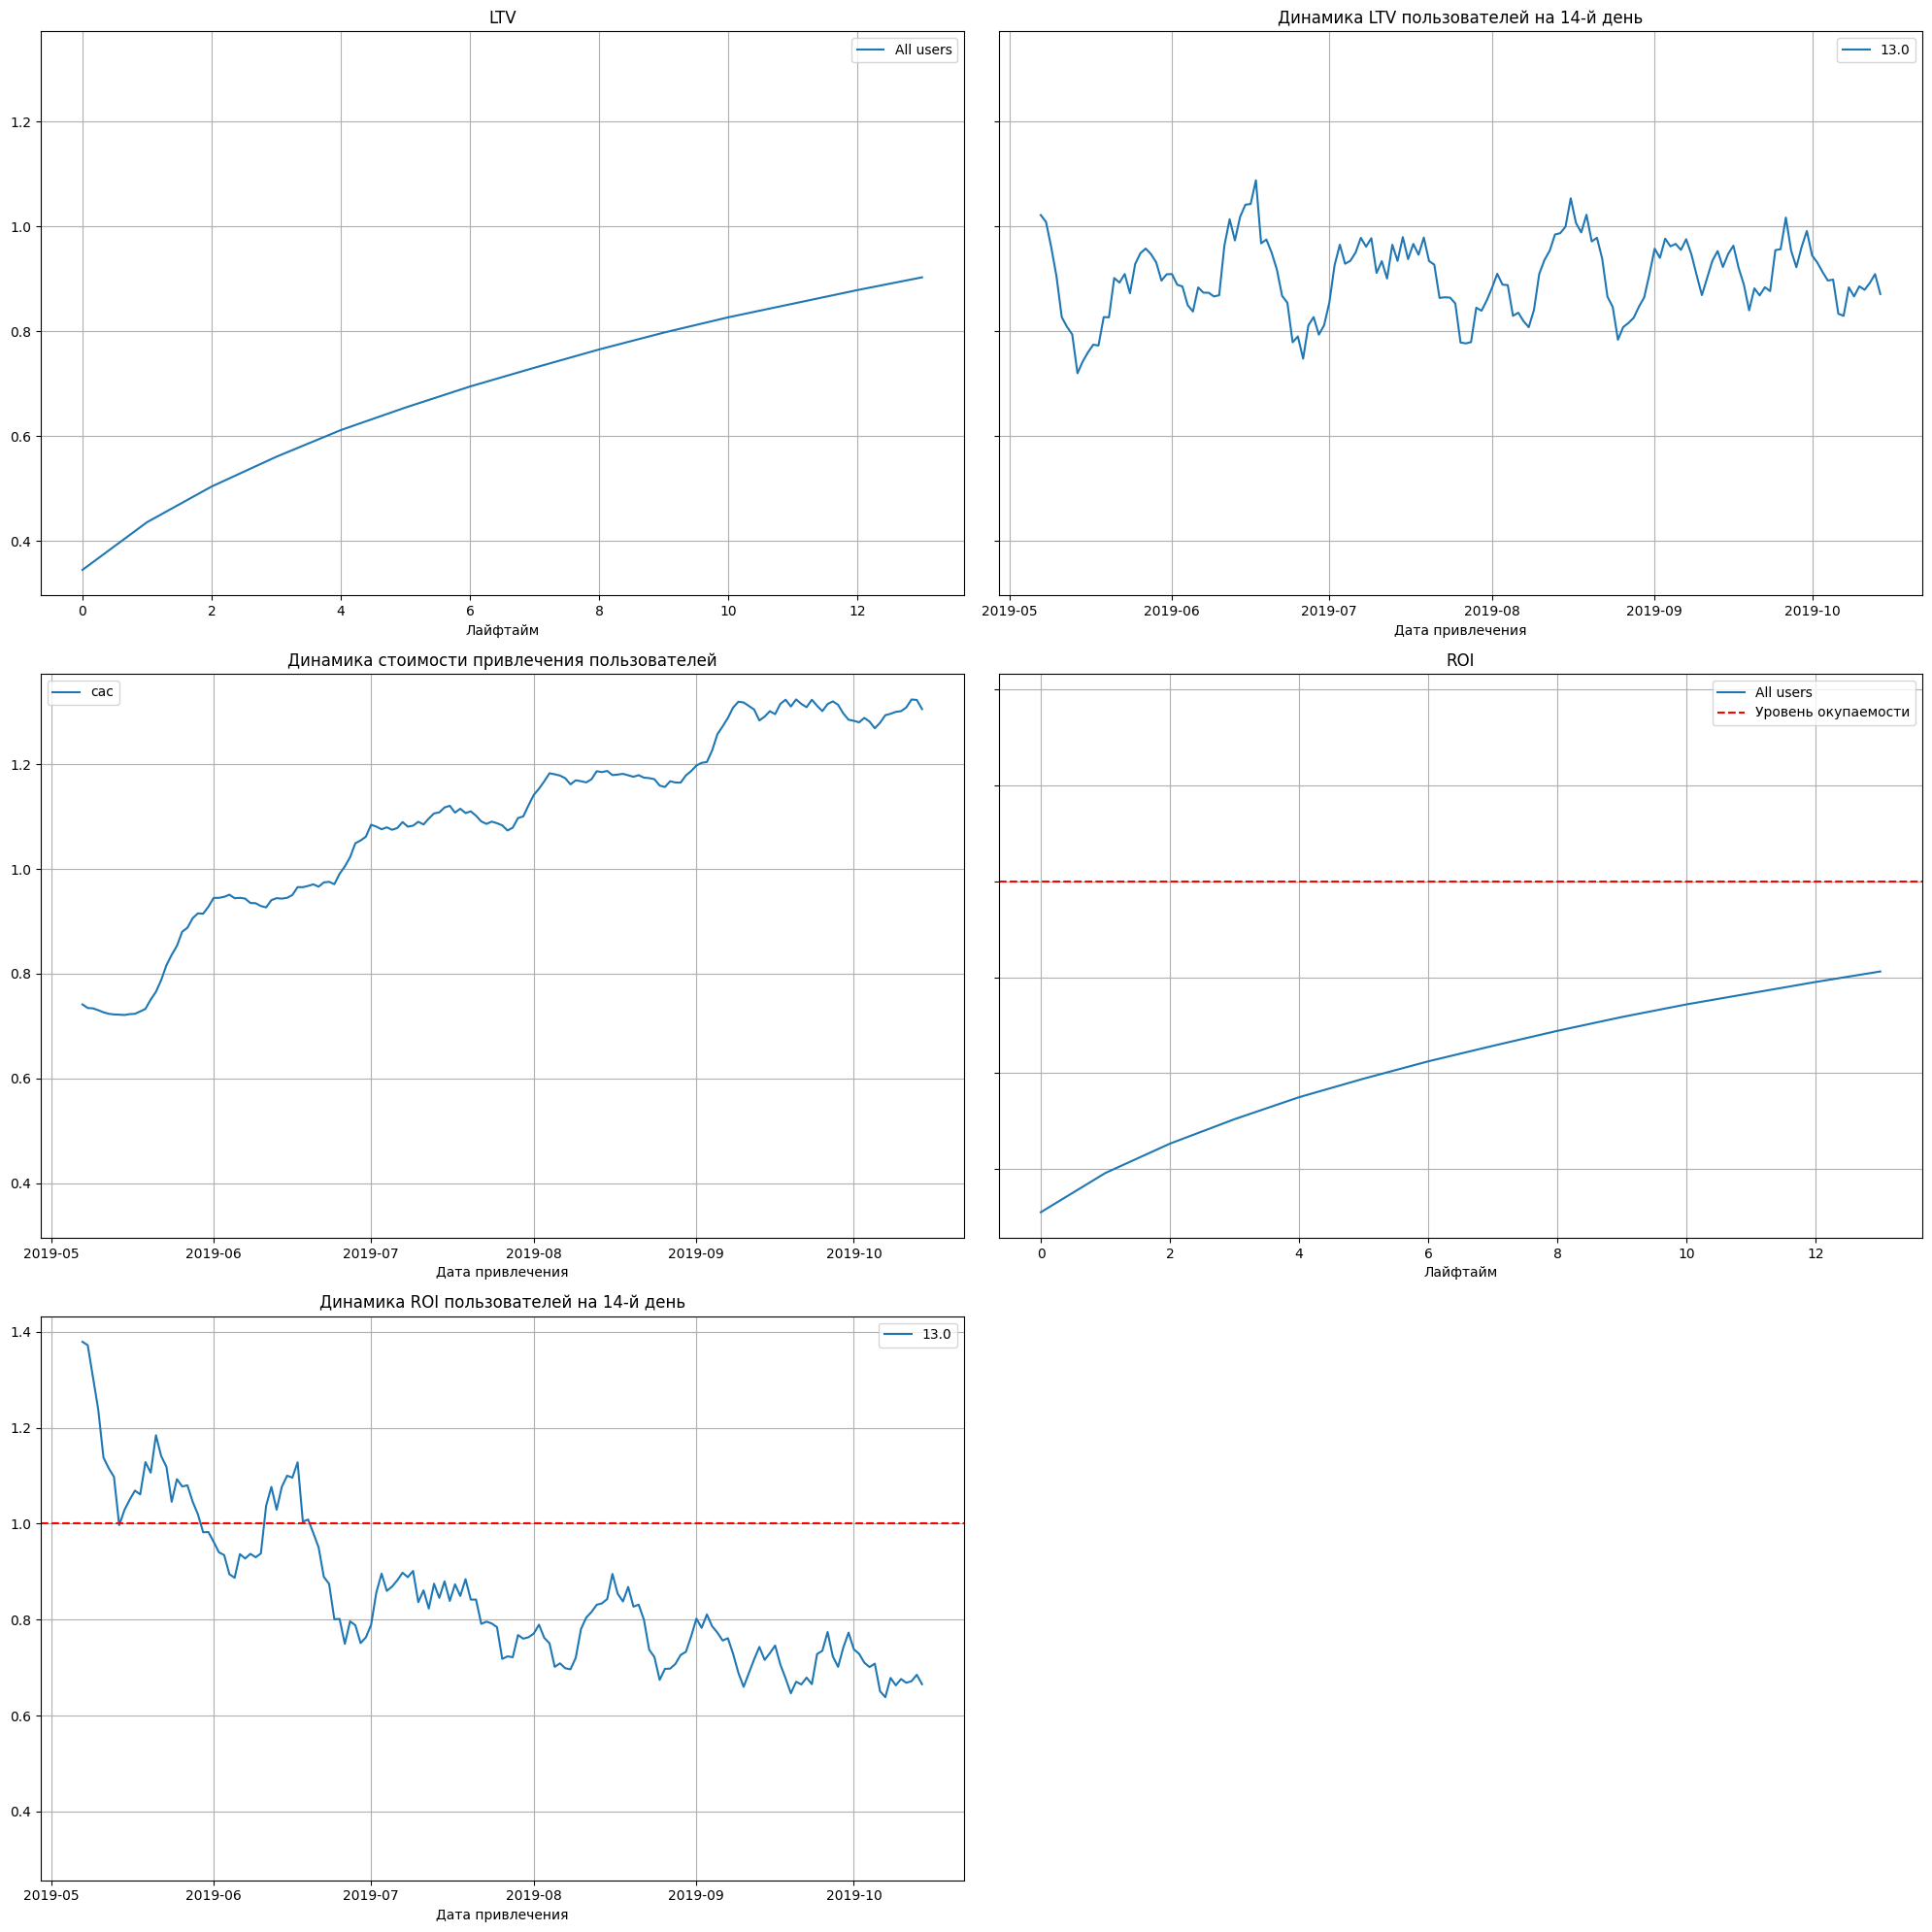

In [105]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_pay, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

На графике ROI видно за 14 дней клиент окупается лишь на 80%.
В динамике LTV пользователей на 14 день наблюдается сезонность, однако значения не выбиваются из диапазона 0.8-1.0.
Стоимость привлечения стабильно увеличивается. При этом ROI пользователей на 14 день снижается, что говорит о низкой эффективности.

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> 

Корректный анализ, рекламная кампания не окупается.

</div>


Проверим конверсию пользователей и динамику её изменения. Построим и изучим графики конверсии 

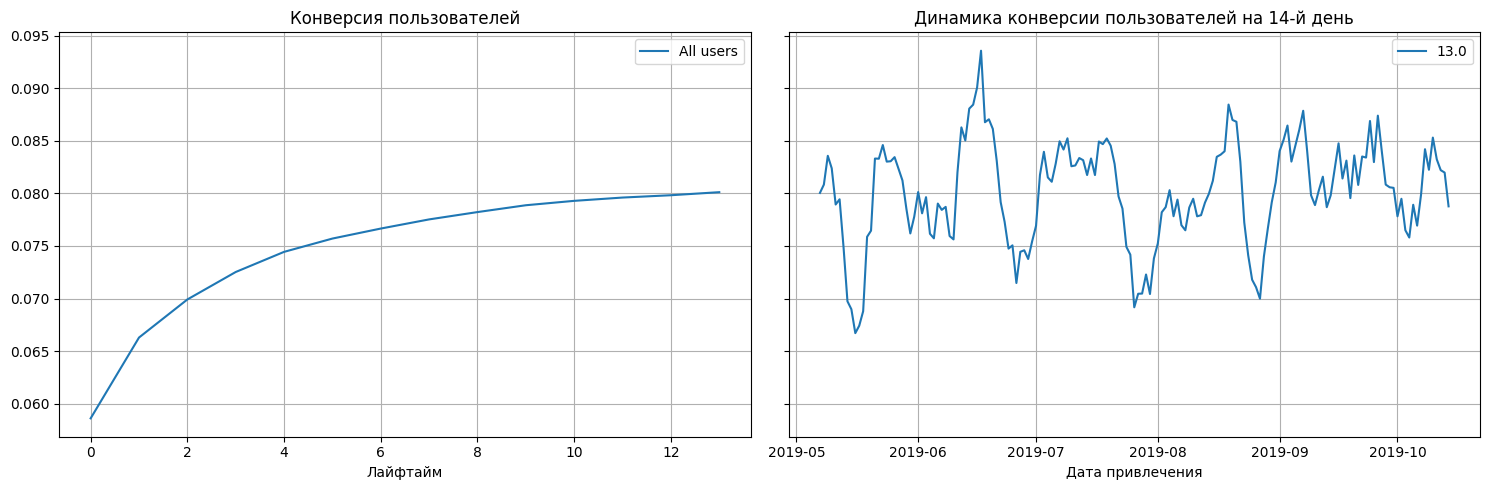

In [106]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_pay, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Графики конверсии говорят о том, что 80% пользователей становятся покупателями
, в динамике присутствуют некоторые всплески, наверняка есть сезонность.

Проверим удержание пользователей и динамику её изменения. Построим и изучим графики удержания.

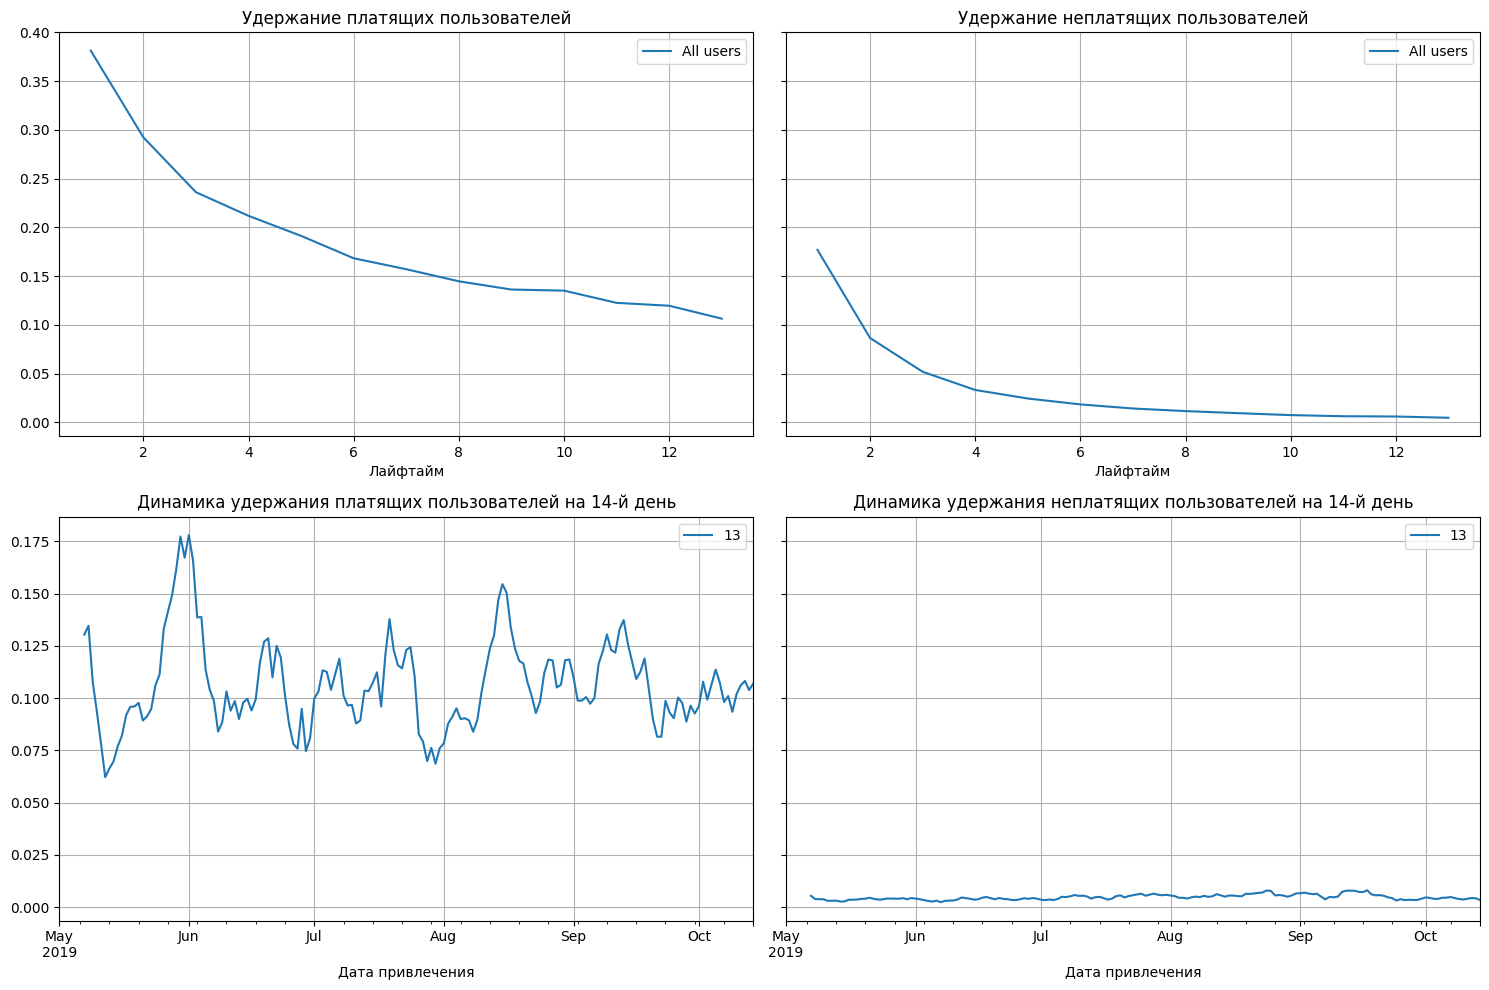

In [107]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_pay, visits, observation_date, horizon_days, 
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Заметно, что со второго дня остаются более 38% пользователей согласно графику удержания платящих пользователей.Который идет по экспоненциальной ниспадающей и показыает плавное снижение. Для неплатящих пользователей совсем мало интересного, на второй день остается менее 20%.

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> 

Отличный анализ конверсии и удержания.
</div>


Проанализируем окупаемость рекламы с разбивкой по устройствам

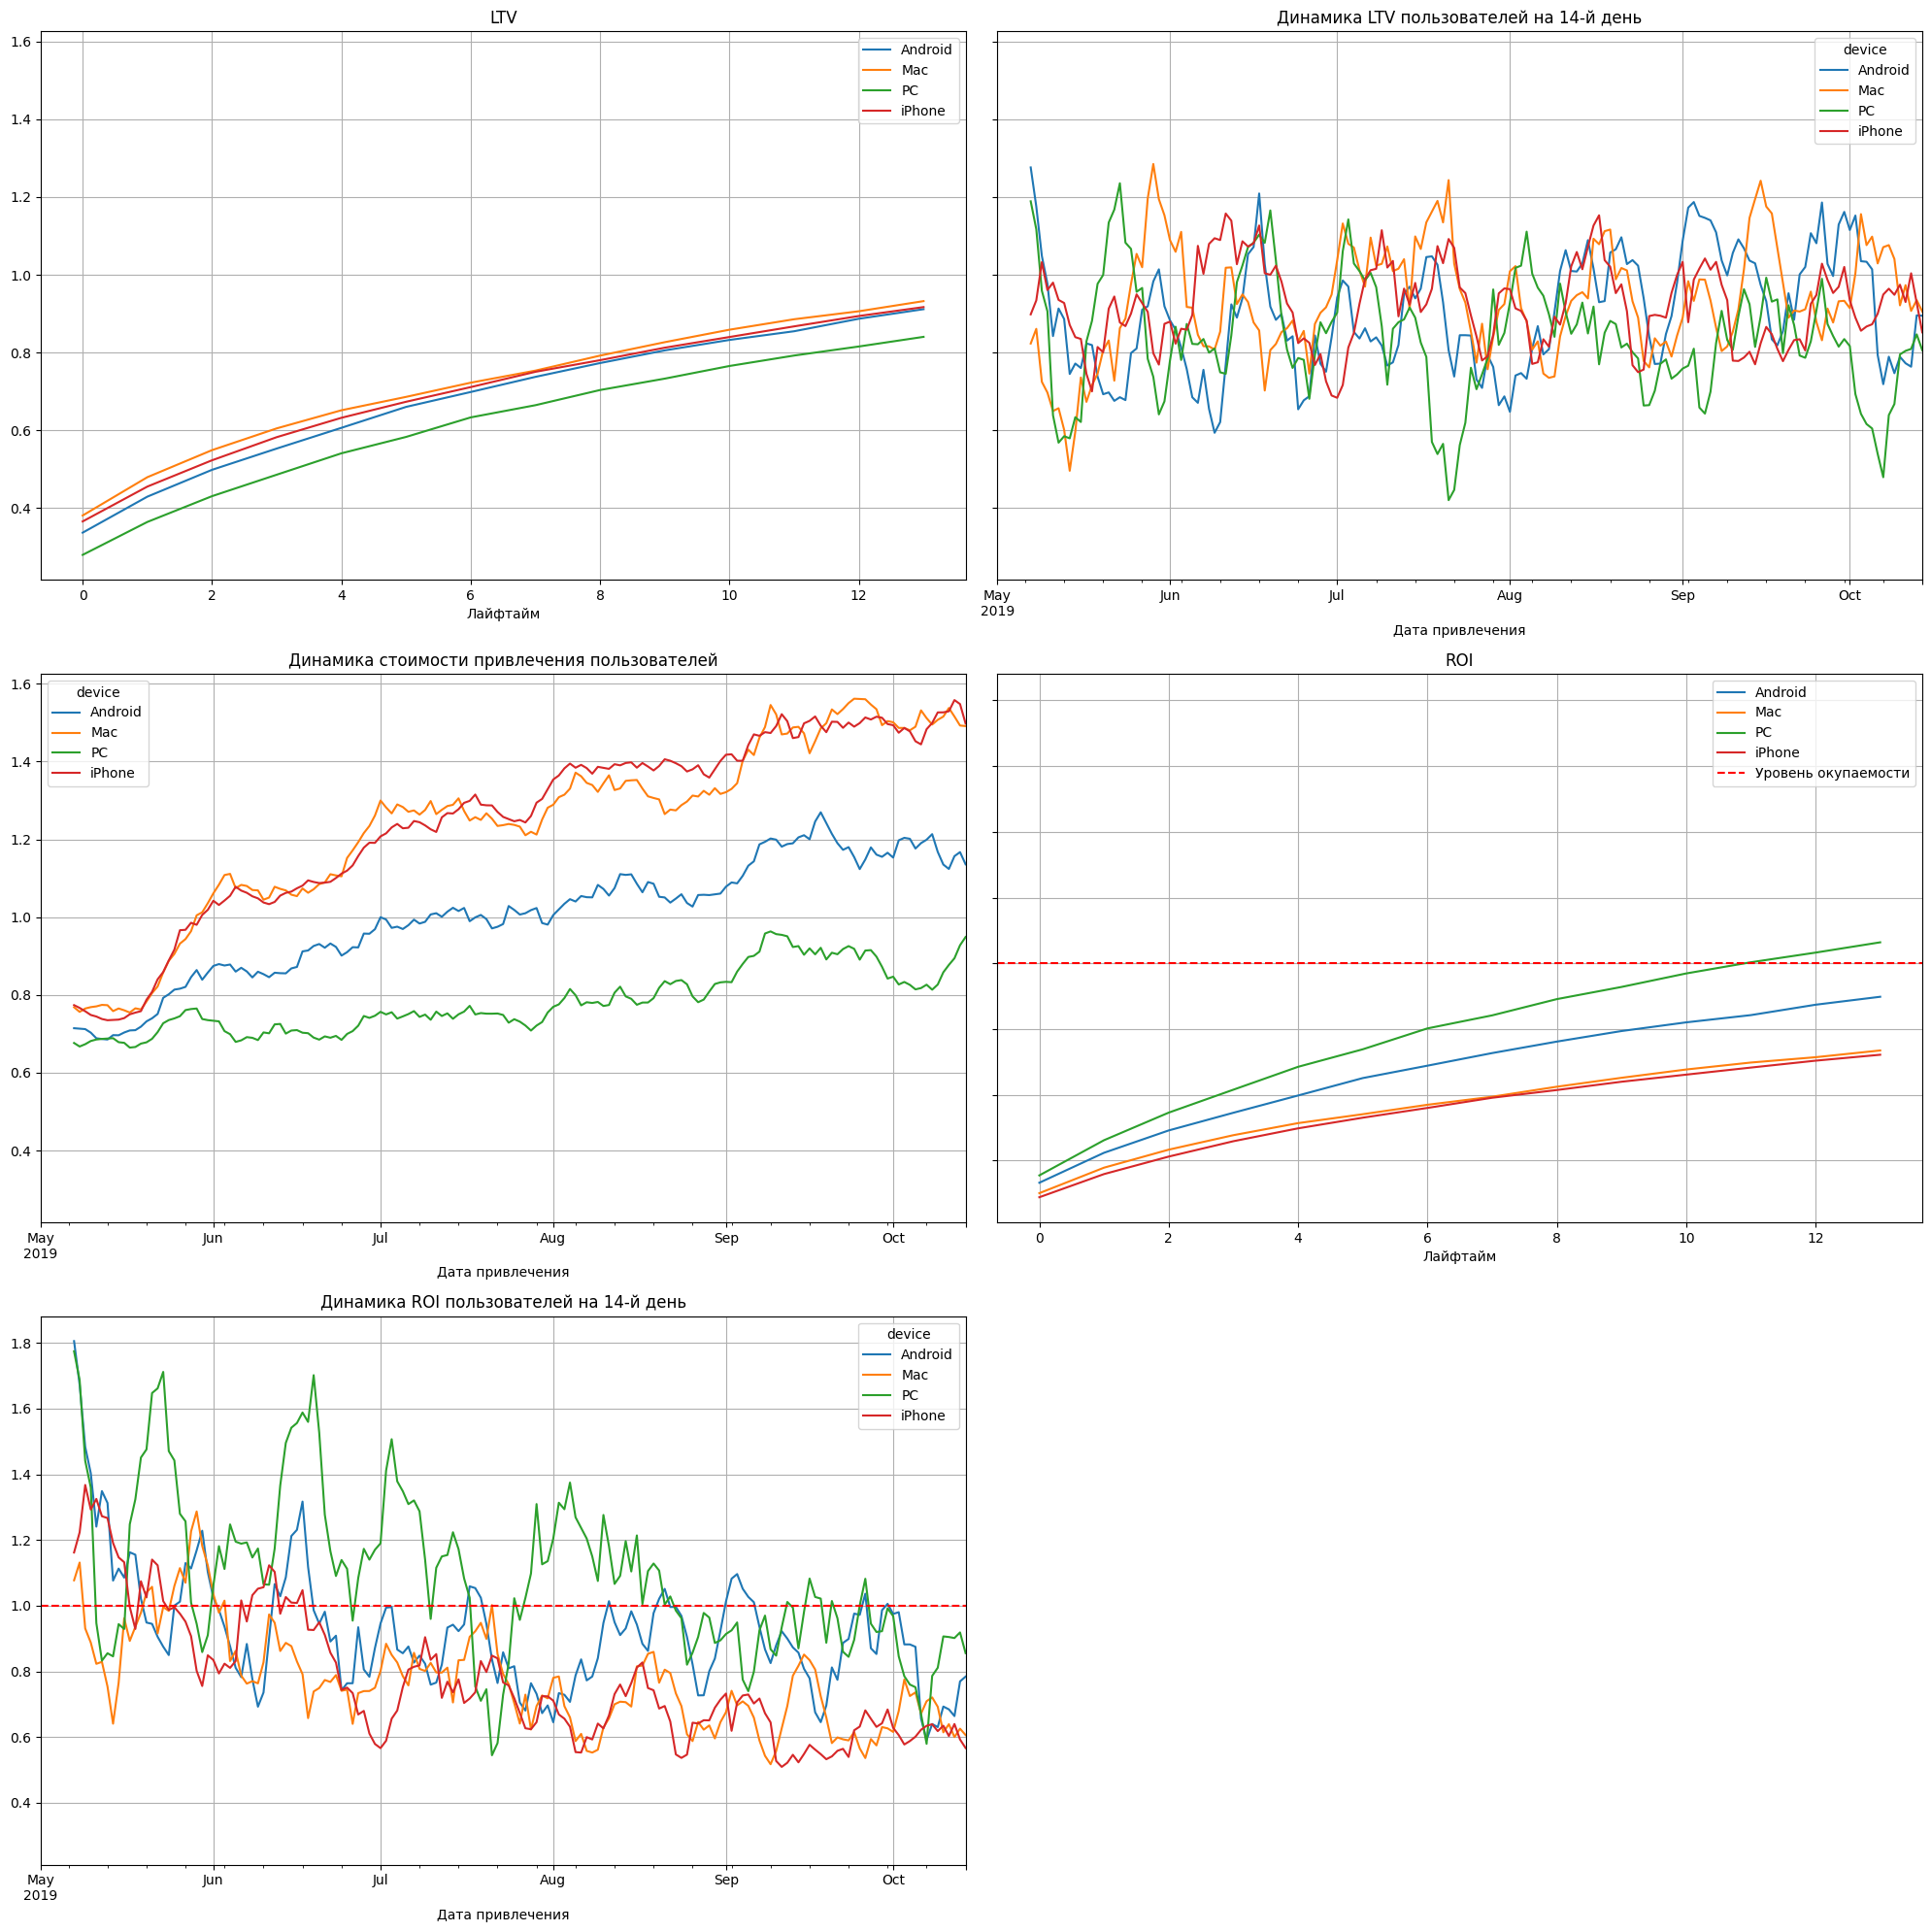

In [108]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_pay, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По устройствам можно сделать вывод что в целом LTV показыает схожие показатели. Ярко выраженные всплески для устройств Mac в динамике LTV, показыают положительный для компании результат.
ROI показывает что за две недели окупаемости достигают только пользователи PC, так же для них и сохранялась положительная динамика почти весь рассматриваемый период, что нельзя сказать о пользователях Mac и iPhone. Динамика окупаемости для них начала отсутствовать с средины Июня. Хотя они идут в основных показателях стоимости привлечения, получается затраты на них не окупаются 

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> 

Корректный анализ в разрезе устройств </div>


Проанализируем окупаемость рекламы с разбивкой по странам

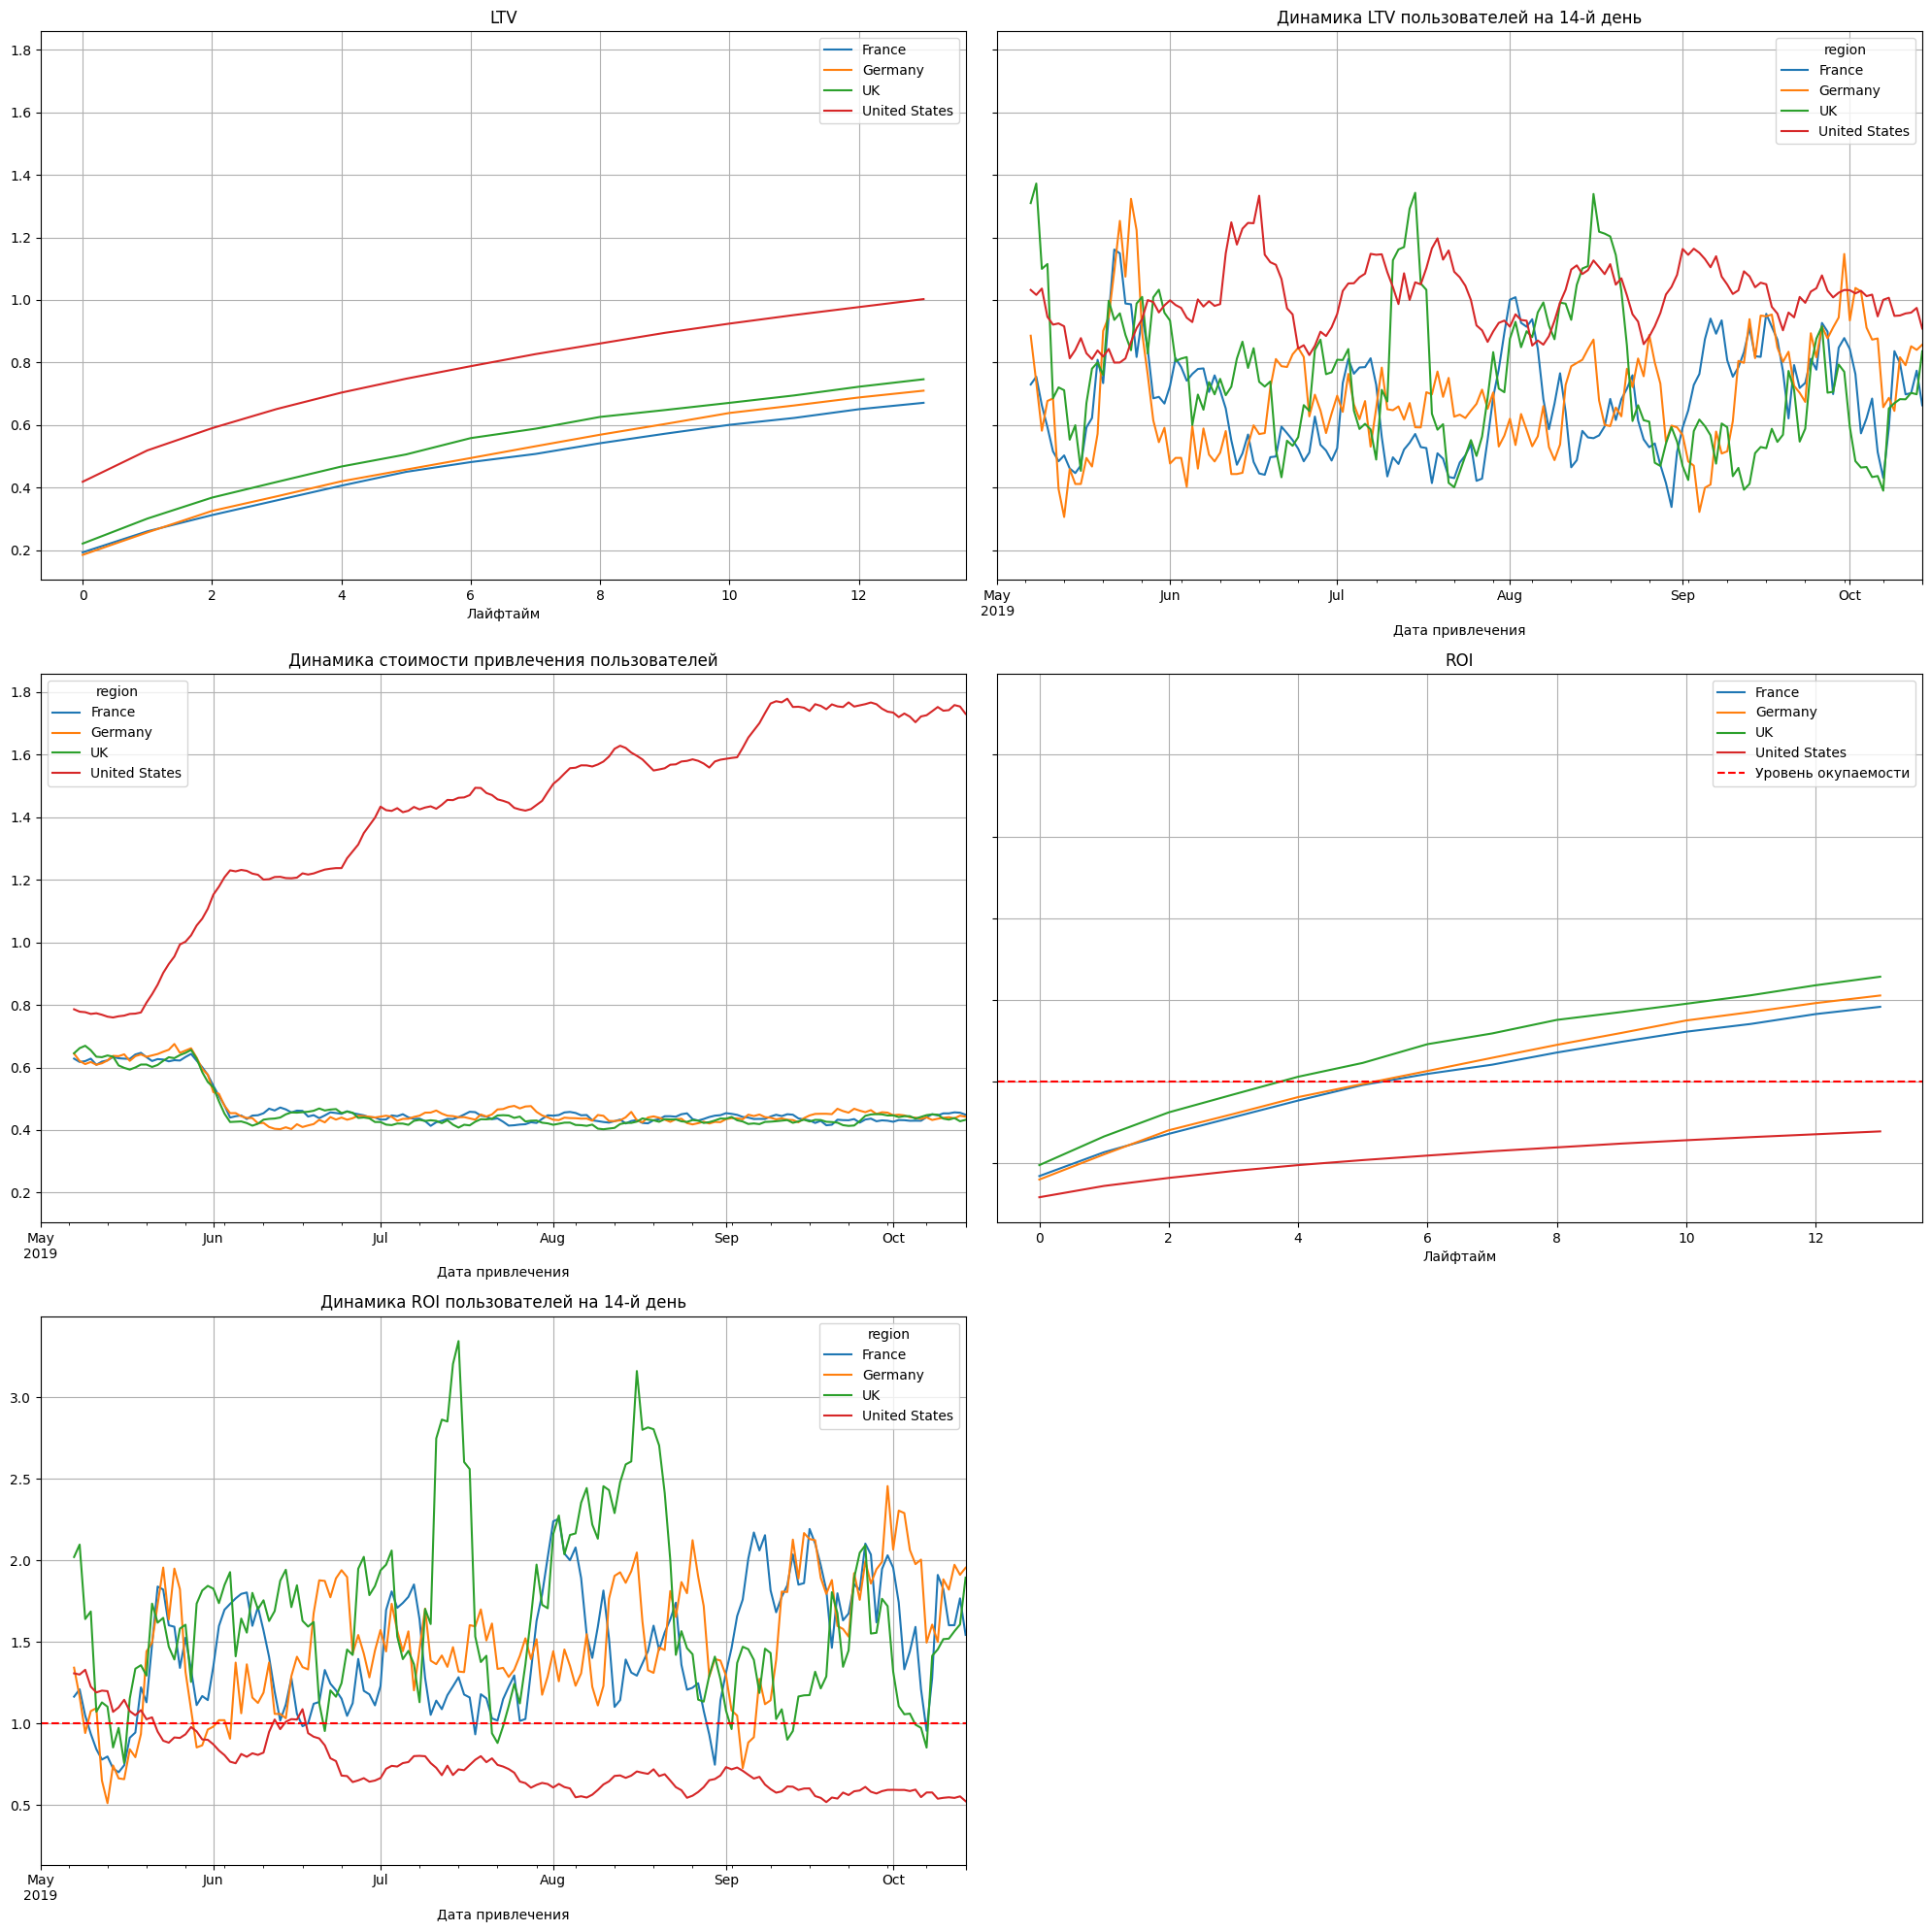

In [109]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_pay, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

В разбивке по странам, можно сказать, что вложенные средства для привлечения пользователей из United States не окупаются компании за весь период начиная с Июня. У остальных стран, положительная окупаемость. Лидерами является UK и Germany
По вложениям заметно, что инвестиции поступают приемущественно в United States, что подтверждает показатель LTV - лидирующая страна United States. Но не смотря на большие вложения, показатели LTV остальных стран также на высоком уровне. В динамике LTV также на весь период United States показывает высокий результат,что характерно для такого размера вложенных средств, хотя есть два всплеска динамики LTV для UK которое опережает United States.

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Поправил</div>


<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера:</b> 

Добавь, пожалуйста, в вывод анализ графика LTV и стоимости привлечения.
</div>


Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

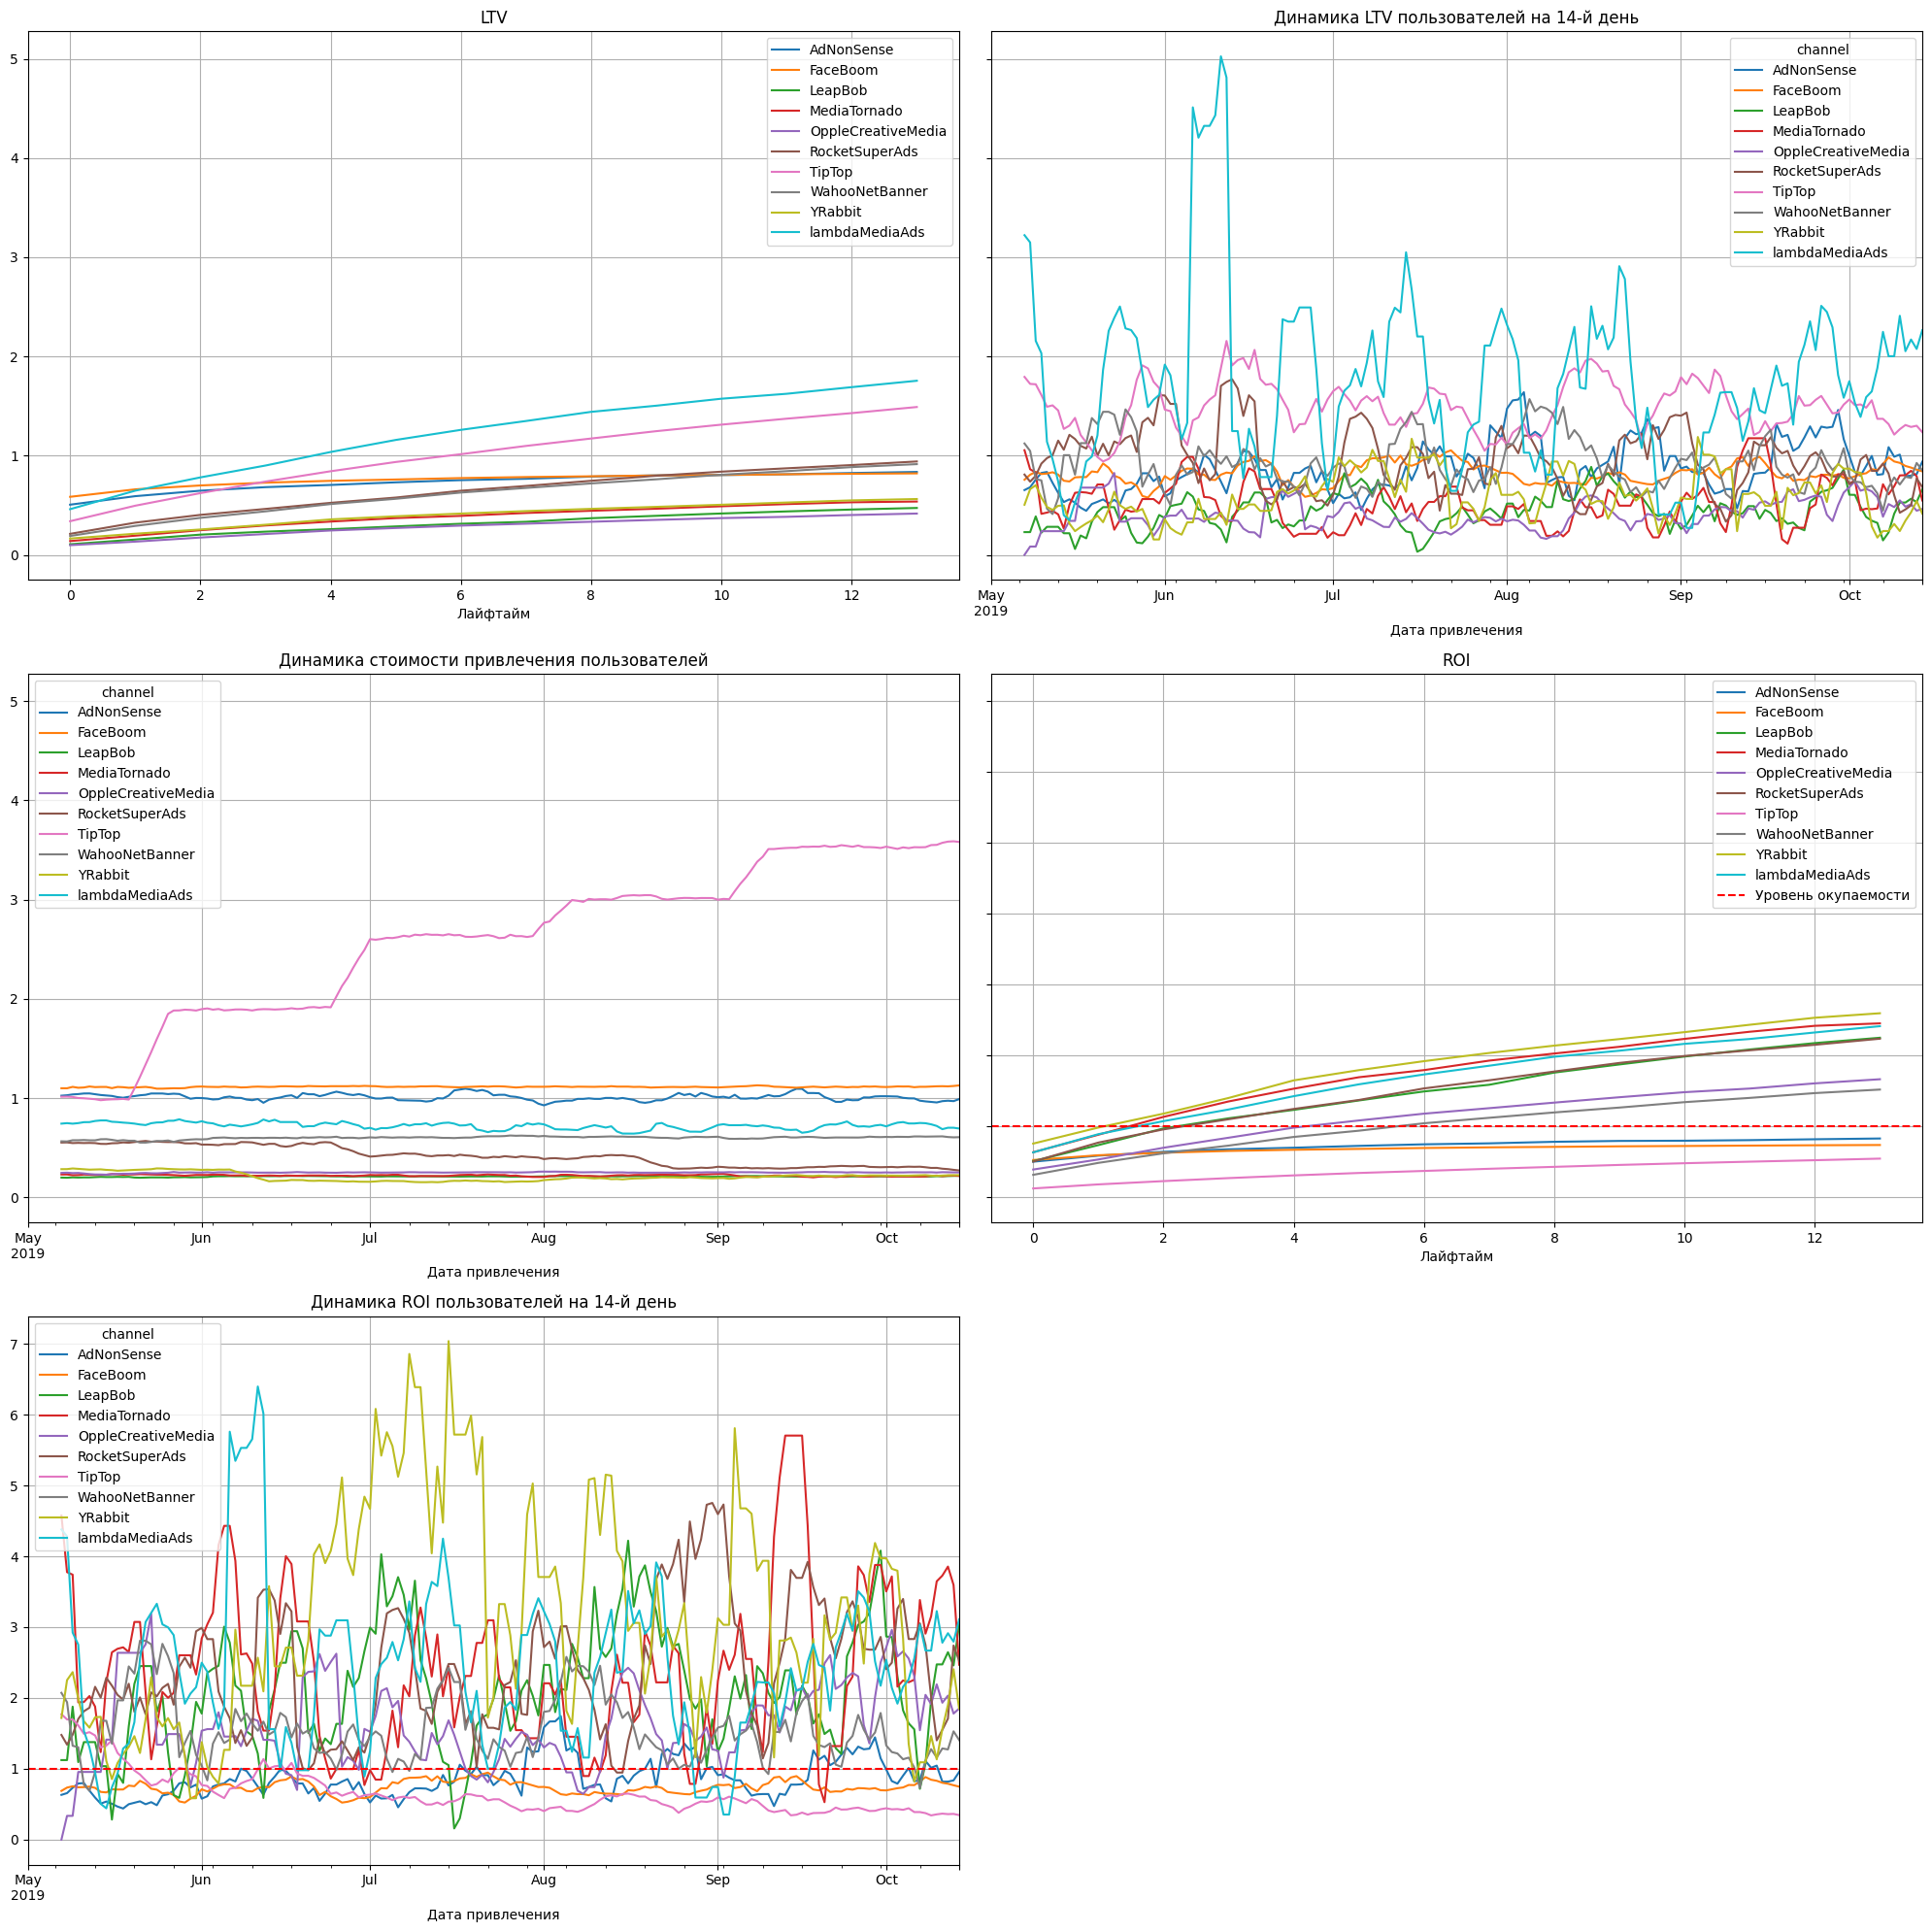

In [110]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_pay, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Основные вложения идут для канала Tip Top, которые не достигает окупаемости привлечения за 14 дней, а на графике удержания видно, что за весь период он так и не был оправдан. Вместе с ним идет канал FaceBoom который привлекал меньшие вложения, тоже показывает отрицательный результат.
Лучшие показатели окупаемости  и прибыли  имеют каналы LambdaMediaAds и Media Tornado, YRabbit.
Что интересно LTV показывает для канала LambdaMediaAds наивысший результат, Tip Top оказывается строчкой ниже, хотя вложенных средств на рекламу для канала LambdaMediaAds намного меньше Tip Top. В динамике лидер также канал LambdaMediaAds, следующий примерно одинаковый уровень показывают каналы Tip Top и RocketSuperAds.

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> 

Согласен с анализом в разрезе каналов привлечения.
</div>



<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера:</b> 

Здесь также необходимо добавить анализ графика LTV
</div>


<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Поправил</div>

### Вывод

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Причины неэффективности привлечения пользователей:
- Проблемы окупаемости вызваны неправильным распределением ресурсов, и тем, что каналов привлечения очень много, отследить результат можно раньше. Из-за отсутствия периодического анализа окупаемости, таким образом можно вложить много средств не в те каналы и страны, котрые показывают низкую конверсию и окупаемость. Как и получилось для каналов Tip Top и FaceBoom. То же касается и устройств привлечения, Mac и iPhone. Пользователи PC показывают результат окупаемости гораздо лучше, при отсутствии вложений в маркетинг.

Рекомендации для отдела маркетинга:
- Обратить внимание на привлечение пользователей из стран UK и France, показатели которых на высоком уровне и без привлечения инвестиций, похоже что пользователям нравится продукт, если сделать дополнительные акции и бонусы можно увеличить прибыль.
- Обратить внимание на привлечение пользователей по каналам LambdaMediaAds Media Tornado, YRabbit.
- Не завышать параметры вложений для 1 или двух каналов.
- Динамику поведения пользователей, можно отслеживать своевременно.(раз в месяц)
- United States - является основной страной привлечения. Возможно стоит пересмотреть рекламные источники TipTop и FaceBoom, возможно их получится  улучшить или заменить, что повысит качество привлекаемых пользователей.
- Обратить внимание на пользователей которые используют PC, они характерны высокими показателями конверсии и окупаемости.


<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера:</b> 

Здесь тогда в следующей итерации ожидаю общий вывод и рекомендации.
</div>


<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Поправил</div>

<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера по проекту

<div class="alert alert-success">
Проделана хорошая аналитическая работа. Соблюдена структура проекта и написаны хорошие выводы. Есть несколько замечаний, исправь их и проект будет принят.
</div>

<div class="alert alert-danger">
    
- скорректируй, пожалуйста, код, выпадающий в ошибку
    
- дополни, пожалуйста, промежуточные выводы и добавь рекомендации.
    
</div>
</div>
